<a href="https://www.kaggle.com/code/anderaraujo/hr-prediction-of-promotion-complete-pipeline?scriptVersionId=163741438" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# HR PREDICTION OF PROMOTION | COMPLETE PIPELINE
### This Entire analysis will try to predict a promotion for HR department.

This project also could predict churn of employees and other business problems related to classification.

## Steps
* <a href="#loading_libs">Loading Libs</a>
* <a href="#eda">Exploratory Data Analysis</a>
* <a href="#pipeline">Spliting Data + Pipeline creation</a>
* <a href="#fit_predict">Fitting and Predicting</a>
* <a href="#next_steps">Next Steps</a>

<h2 id="loading_libs">Loading Libs</h2>

In [183]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

## Loading Data

In [184]:
# Loading Data - We are gonna use just train test for this model and split it
df = pd.read_csv('/kaggle/input/hranalysis/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


<h2 id="eda">Exploratory Data Analysis</h2>

In [185]:
# Checking null values
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Let's skip Na value for is_promoted column

In [186]:
df = df.dropna(subset='is_promoted')

Checking duplicated values

In [187]:
df.duplicated().sum()

0

Let's see how many regions we have

In [188]:
df['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

There are so much regions and I will drop this columns

We need to check some statistics of data to understand a bit more about them

In [189]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Just 8% of employees was promoted

In [190]:
num_cols = df.select_dtypes(exclude='object').columns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/si

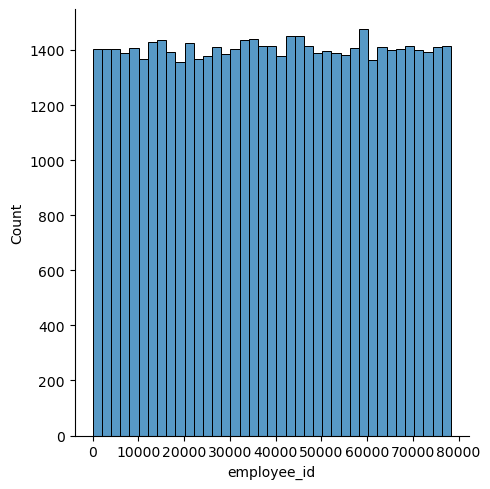

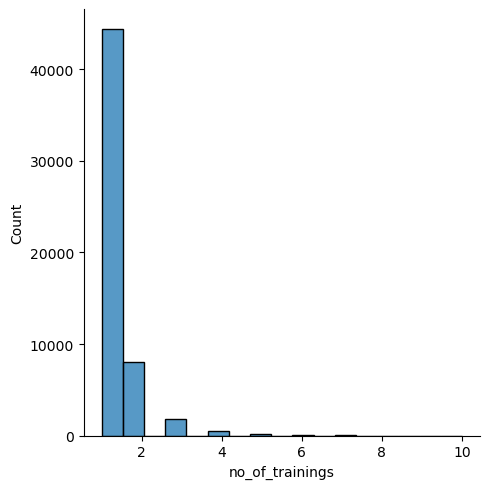

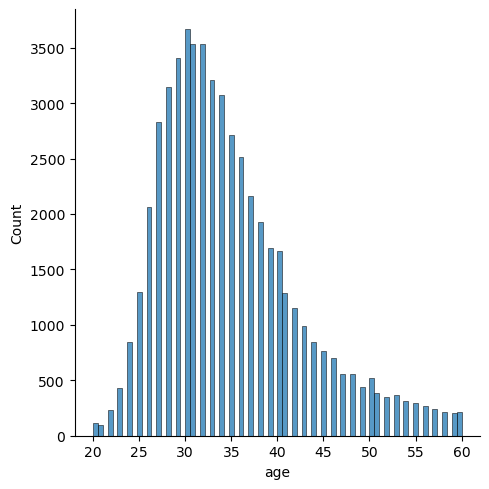

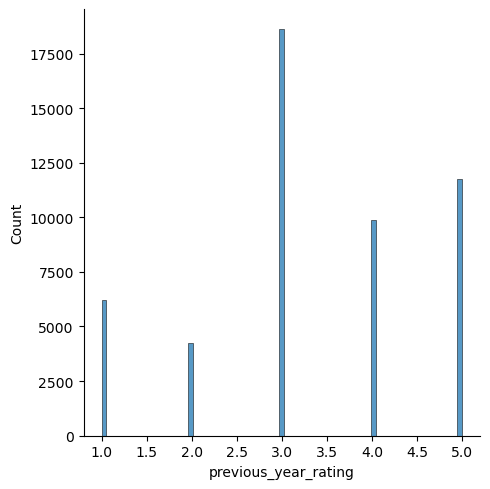

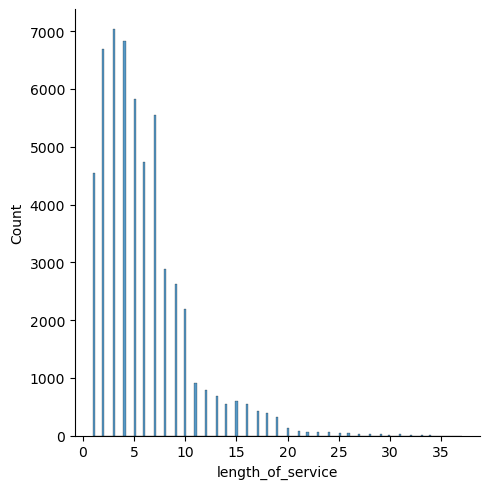

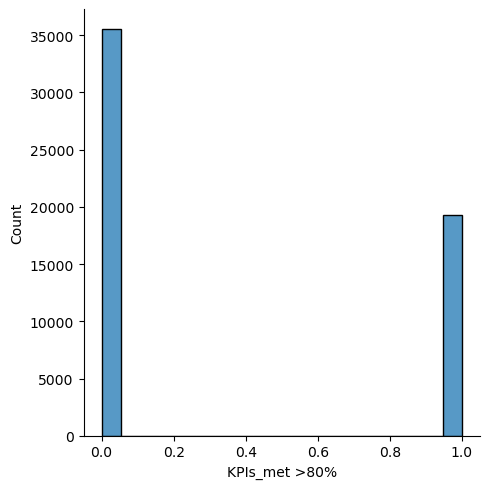

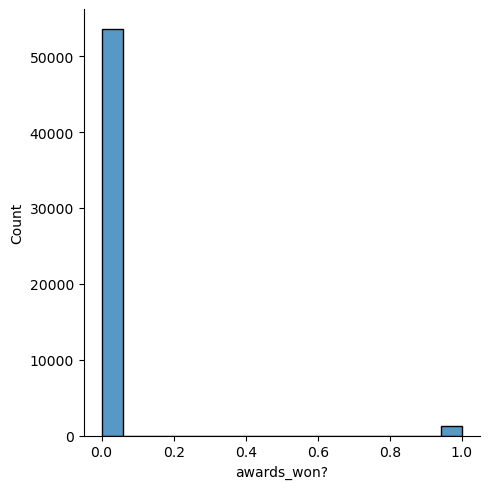

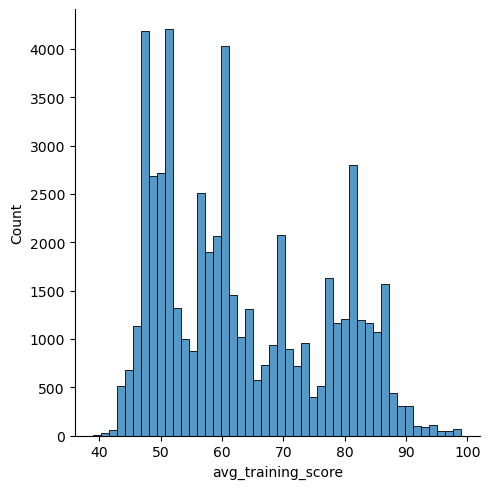

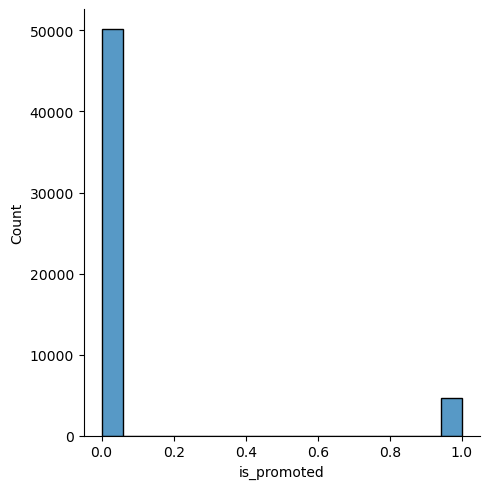

In [191]:
for pl in num_cols:
    sns.displot(data=df, x = pl)

## Observations about distributions

- Most part of people has education level 2
- Most part of people took just one training
- Employees age are between 25 and 40 years old
- In the last year most part of employees had a medium rating

In [192]:
df.drop(columns=['employee_id','region'], inplace = True)

Text(0.5, 1.0, 'Promoted per gender')

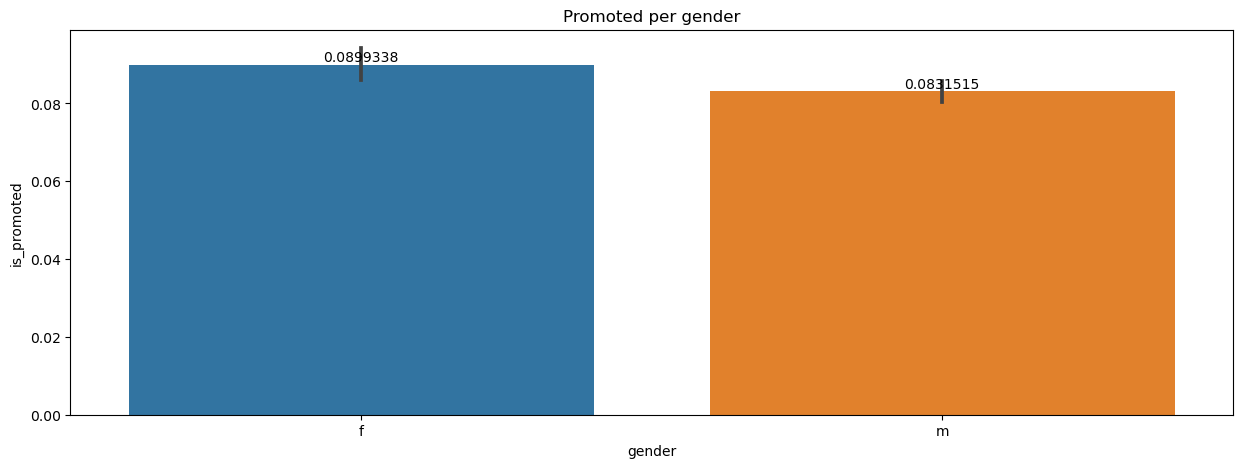

In [193]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data = df, x = 'gender', y = 'is_promoted')
ax.bar_label(ax.containers[0])
plt.title('Promoted per gender')


female gender use to be more promoted than male, is female gender more prepared?

In [194]:
def plt_bar(data, x, y, title):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(data = df, x = x, y= y, hue='gender', errorbar=None)
    ax.bar_label(ax.containers[0],fmt='%.2f')
    ax.bar_label(ax.containers[1],fmt='%.2f')
    plt.title(title)

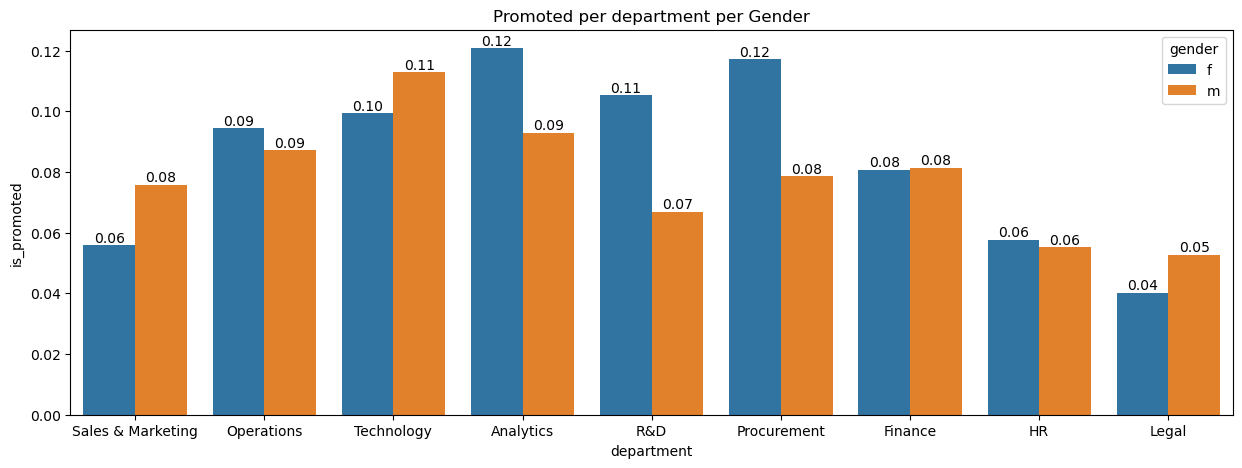

In [195]:
plt_bar(df, 'department','is_promoted','Promoted per department per Gender')

We see that female gender are more promoted in strategic sectors

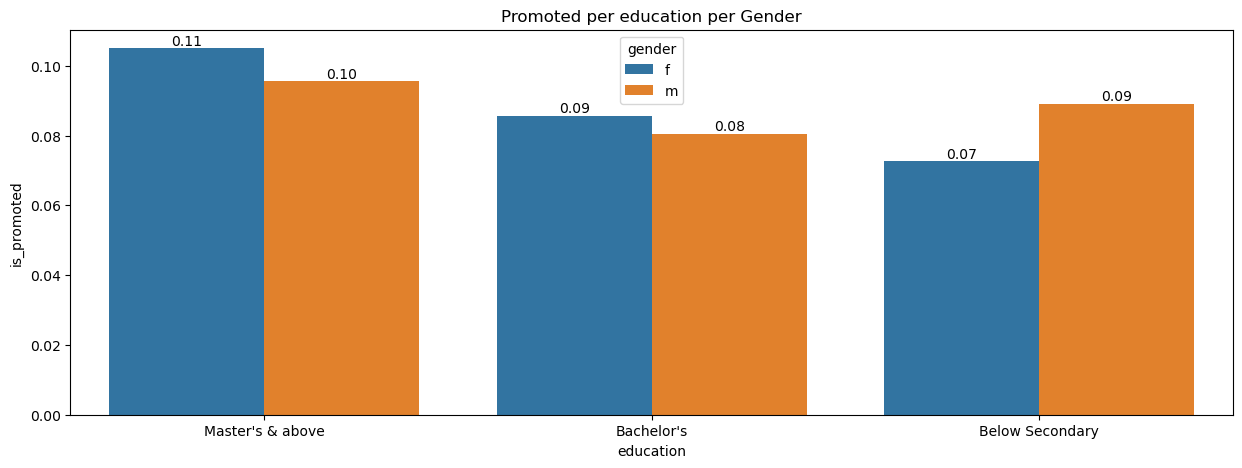

In [196]:
plt_bar(df, 'education','is_promoted','Promoted per education per Gender')

Women are more educated than Men for Bachelors category and Post graduate category

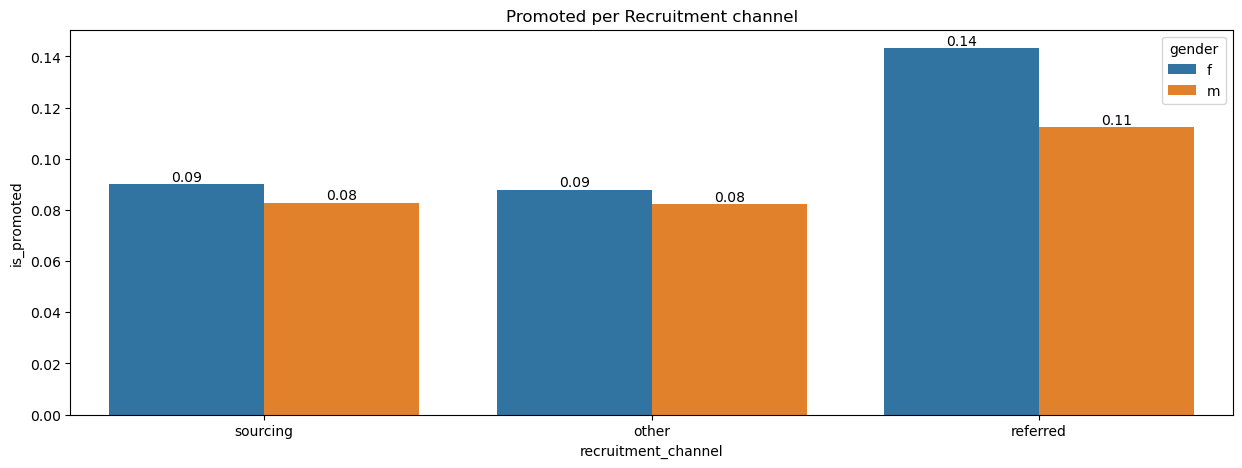

In [197]:
plt_bar(df, 'recruitment_channel','is_promoted','Promoted per Recruitment channel')

All the recruitment channels hire women more than men

Now let's get dummies from data in order to get a complete correlation matrix

<Axes: >

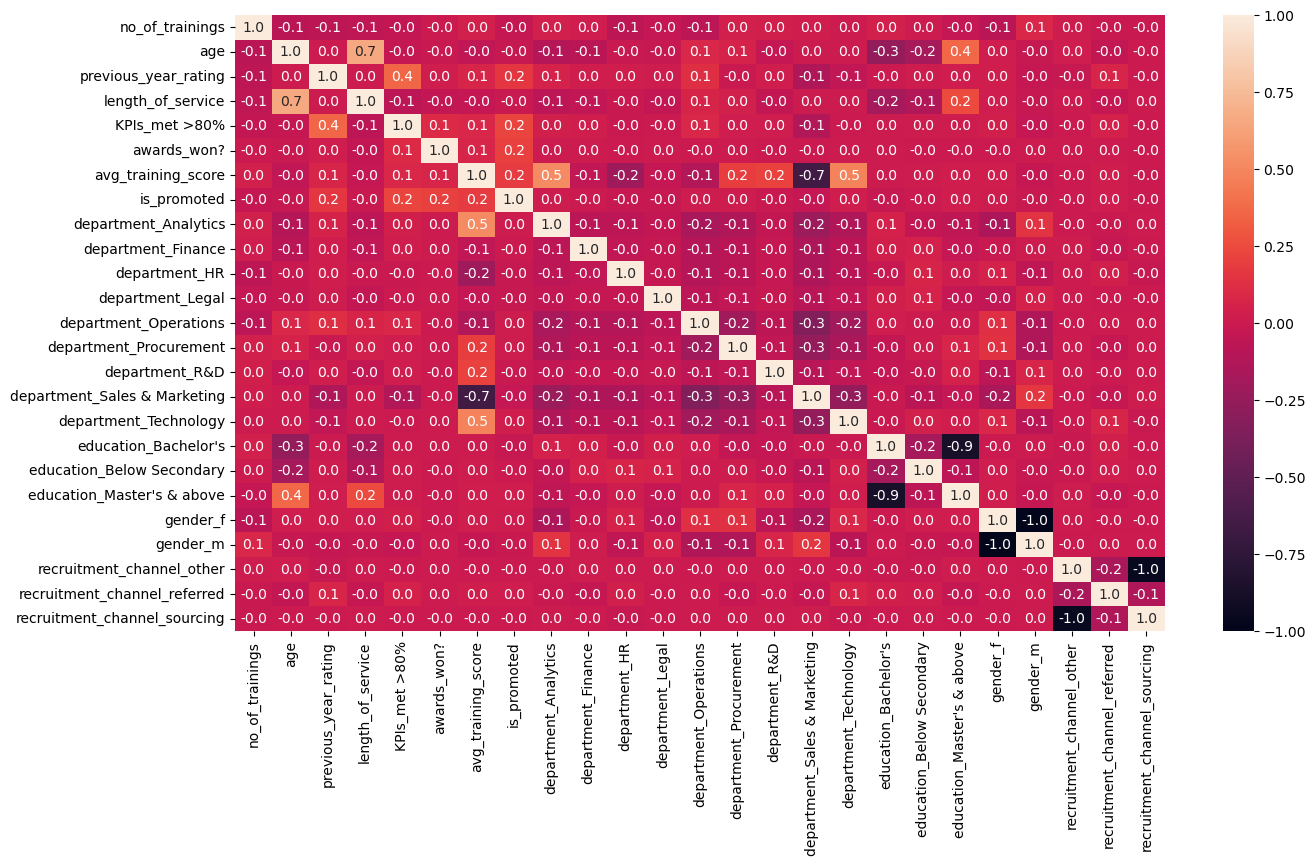

In [198]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.get_dummies(df).corr(), annot=True, fmt='.1f')

There are no features high correlated to "is promoted"

<h2 id="pipeline">Spliting Data + Pipeline creation</h2>

In [199]:
X = df.drop(columns=['is_promoted'])
y = df['is_promoted']

separating columns in numerical and categorical

In [200]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns

defining the methods to input missing values and transform data

In [201]:
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_transformer', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

creating a preprocessor to transform data

In [202]:
preprocessing_pipeline = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
]
    )

defining a parameter grid to tunning model

In [203]:
param_grid = {
    'svm__tol':[0.001, 0.0001],
    'svm__C':[0.1, 0.01]
}

<h2 id="fit_predict">Fitting Pipeline</h2>

Creating the final pipeline with transformations and model fit

In [204]:
final_pipeline = Pipeline(steps=[
    ('preprocess',preprocessing_pipeline),
    ('svm', LinearSVC())
])

grid_search = GridSearchCV(final_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('knn_imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('cat_transformer',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object'))])),
                                       ('svm', LinearSVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 0.01], 'svm__tol': [0.001, 0.0001]},
             scoring='accuracy')

Let's see our best score

In [205]:
print(f'We had an accuracy of {grid_search.best_score_ * 100:.2f}%')

We had an accuracy of 93.22%


Getting the best pipeline

In [206]:
best_pipeline = grid_search.best_estimator_

Let's get score variation acording to a normal curve with a confidence interval of 95%

In [207]:
from sklearn.model_selection import cross_val_predict, cross_val_score

scores = cross_val_score(best_pipeline, x_train, y_train, cv = 5)
score_min = scores.mean() - (2 * scores.std())
score_max = scores.mean() + (2 * scores.std())

print(f'scores can vary from {round(score_min, 3)} to {round(score_max, 3)} with mean of {round(scores.mean(), 3)}')

scores can vary from 0.929 to 0.935 with mean of 0.932


In [208]:
predictions = cross_val_predict(best_pipeline, x_train, y_train, cv = 5)

Let's see our confusion matrix

<Axes: >

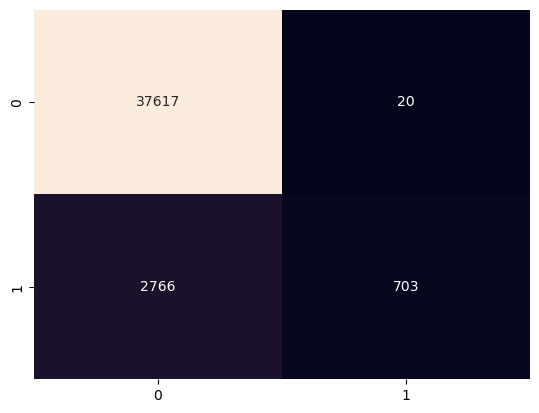

In [209]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_train, predictions), annot=True, fmt='d', cbar = False, )

In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_train, predictions, target_names=['not promoted','promoted']))

              precision    recall  f1-score   support

not promoted       0.93      1.00      0.96     37637
    promoted       0.97      0.20      0.34      3469

    accuracy                           0.93     41106
   macro avg       0.95      0.60      0.65     41106
weighted avg       0.93      0.93      0.91     41106



Now we are going to test our model on data never seen before. But first, let's transform our validation data

In [211]:
df_test = pd.read_csv('/kaggle/input/hranalysis/train.csv')

In [212]:
df_test.drop(columns=['employee_id','region'],inplace=True)

In [213]:
x_test = df_test.drop(columns=['is_promoted'])
y_test = df_test['is_promoted']

In [214]:
validation_preds = best_pipeline.predict(x_test)

In [215]:
print(classification_report(y_test, validation_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.89      0.27      0.42      4668

    accuracy                           0.94     54808
   macro avg       0.91      0.63      0.69     54808
weighted avg       0.93      0.94      0.92     54808



<Axes: >

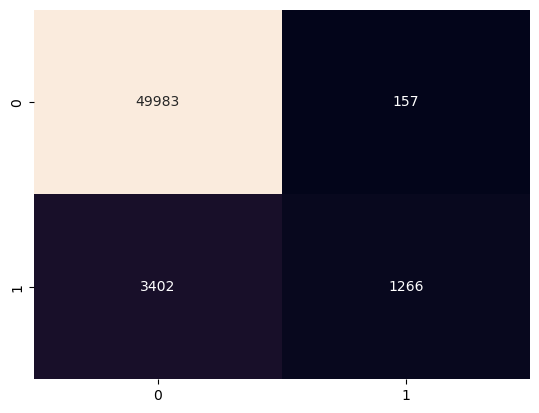

In [216]:
sns.heatmap(confusion_matrix(y_test, validation_preds), annot=True, fmt='d', cbar = False, )

For validation data, our model had a little improvement.

- Precision:

The precision for class 0 is 0.94, which means that 94% of the instances classified as belonging to class 0 are actually class 0.    
For class 1, the precision is 0.89, which means that 89% of the instances classified as belonging to class 1 are actually class 1.    
In other words, when the model predicts that a point is class 0, it is correct 94% of the time; when it predicts that it is class 1, it is correct 89% of the time.    

- Recall:

The recall for class 0 is 1.00, which means that the model correctly identifies 100% of the instances that actually belong to class 0.    
For class 1, the recall is 0.27, which means that the model identifies only 27% of the instances that actually belong to class 1.    
In other words, the model captures all instances of class 0, but captures only a small proportion of instances of class 1.    

- F1-score:

The F1-score is a harmonic mean between precision and recall. It weights precision and recall equally and is useful when there is an imbalance between classes.    
For class 0, the F1-score is 0.97, indicating a good balance between precision and recall.    
For class 1, the F1-score is 0.42, which is low due to low recall.    

# Conclusion

Considering that we would like to predict persons who will be promoted, our f1-score is not good.    
- To improve specifically this model we could colect more data for "promoted" cases.
- We could use more different hyperparameters trying to get better results
- We could use another models with hyperparameters tunning

For this project we are going to stop here. However testing models and improving models performance are important steps to get better results.